In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # cleaning the data
import numpy as np  # for large calculations
import matplotlib.pyplot as plt # matlab
import seaborn as sns
import missingno as msno

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # 0.1
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn import datasets, linear_model
from sklearn import preprocessing

# machine learning
# sklearn
# tensorflow


path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
# removing all non epilepsy results and make output as zero
df["y"].replace({2: 0, 3: 0, 4: 0, 5: 0}, inplace=True)

In [ ]:
df.pop("Unnamed: 0")

0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object

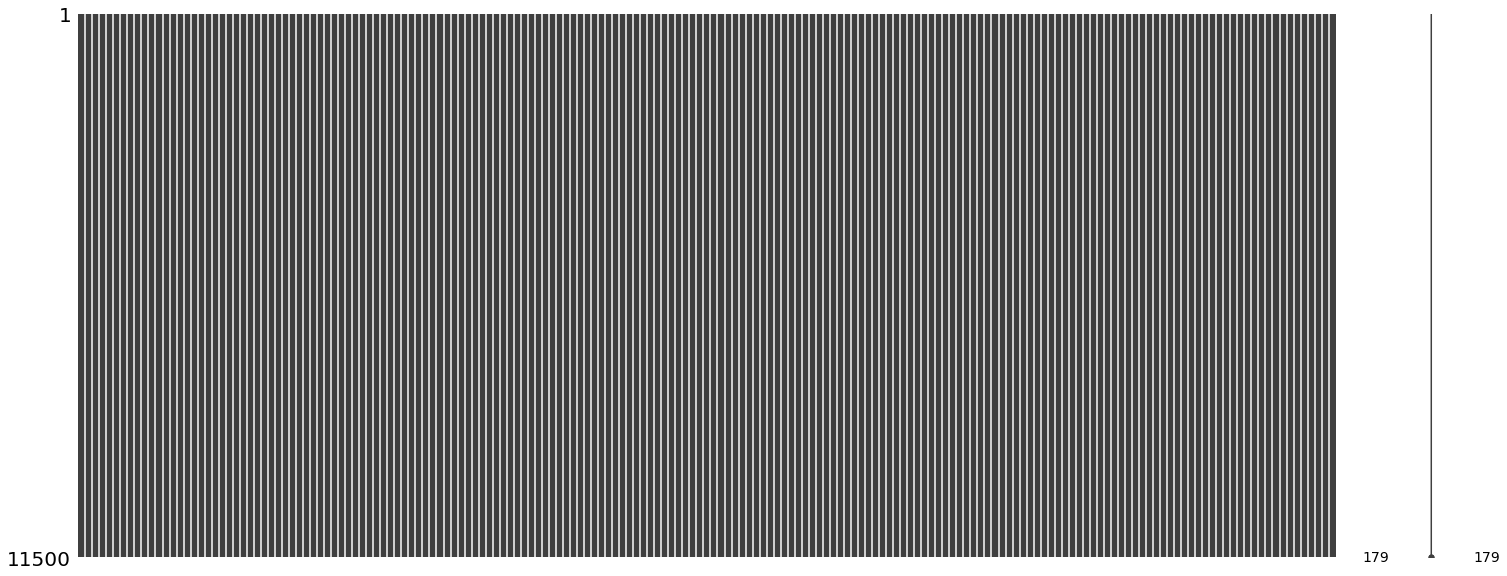

In [ ]:
msno.matrix(df)

In [ ]:
X = df.drop(columns=['y'])
X = X.values.reshape(X.shape[0], X.shape[1], 1) 
print(X.shape)
y = df['y'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)


(11500, 178, 1)


In [ ]:
# ------->  model creation
x = layers.Input(shape=(178, 1)) # we define our input's shape
# first we define our RNN cells to use in the RNN model
# let's keep the model simple ...
cell = layers.SimpleRNNCell(4, activation='tanh')  # ... by just using 4 units (like 4 units in hidden layers)
rnn = layers.RNN(cell)
rnn_output = rnn(x)

In [ ]:
output = layers.Dense(units=1, activation='sigmoid')(rnn_output)

In [ ]:
# let's compile the model
model = keras.Model(inputs=x, outputs=output)
# loss is binary cropss entropy since this is a binary classification task
# and evaluation metric as f1
model.compile(loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 178, 1)]          0         
                                                                 
 rnn (RNN)                   (None, 4)                 24        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [ ]:
H = model.fit(X_train, y_train, epochs=56, verbose=2, validation_data=(X_test, y_test))

Epoch 1/56
252/252 - 9s - loss: 0.6596 - accuracy: 0.5950 - val_loss: 0.6203 - val_accuracy: 0.7826 - 9s/epoch - 34ms/step
Epoch 2/56
252/252 - 7s - loss: 0.5738 - accuracy: 0.7933 - val_loss: 0.5271 - val_accuracy: 0.7997 - 7s/epoch - 26ms/step
Epoch 3/56
252/252 - 7s - loss: 0.4818 - accuracy: 0.8001 - val_loss: 0.4392 - val_accuracy: 0.7997 - 7s/epoch - 26ms/step
Epoch 4/56
252/252 - 7s - loss: 0.4000 - accuracy: 0.8001 - val_loss: 0.3826 - val_accuracy: 0.7997 - 7s/epoch - 26ms/step
Epoch 5/56
252/252 - 7s - loss: 0.3685 - accuracy: 0.8001 - val_loss: 0.3649 - val_accuracy: 0.7997 - 7s/epoch - 26ms/step
Epoch 6/56
252/252 - 7s - loss: 0.3540 - accuracy: 0.8001 - val_loss: 0.3507 - val_accuracy: 0.7997 - 7s/epoch - 27ms/step
Epoch 7/56
252/252 - 8s - loss: 0.3426 - accuracy: 0.8001 - val_loss: 0.3410 - val_accuracy: 0.7997 - 8s/epoch - 32ms/step
Epoch 8/56
252/252 - 7s - loss: 0.3316 - accuracy: 0.8288 - val_loss: 0.3291 - val_accuracy: 0.8470 - 7s/epoch - 26ms/step
Epoch 9/56
252/2

In [ ]:
def plot_results(H):
    results = pd.DataFrame({"Train Loss": H.history['loss'], "Validation Loss": H.history['val_loss'],
              "Train Accuracy": H.history['accuracy'], "Validation Accuracy": H.history['val_accuracy']
             })
    fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
    results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
    results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])
    ax[0].set_xlabel("Epoch")
    ax[1].set_xlabel("Epoch")
    plt.show()

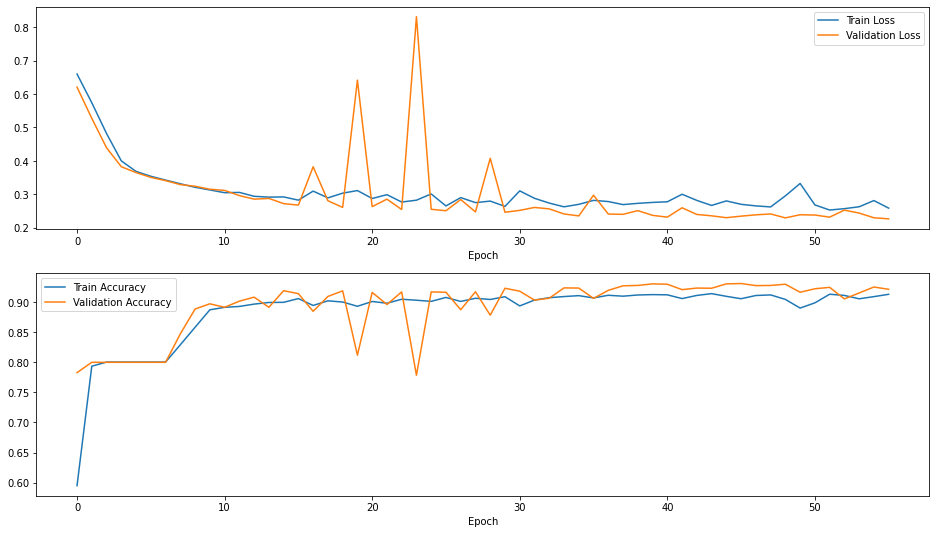

In [ ]:
plot_results(H)

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.09%
